## Spectra generation

In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm
import warnings
from sklearn.exceptions import DataConversionWarning

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

In [2]:
import ast
# Función para convertir string a lista
def string_to_list(string):
    return ast.literal_eval(string)

CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data["label"] = CH4_data["label"].apply(string_to_list)
CH4_data["label"] = CH4_data["label"].apply(lambda x: x[2])
CH4_data.data = CH4_data.iloc[:,-n_points:]
CH4_data.params = CH4_data.iloc[:,:-n_points]

CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"] = CO2_data["label"].apply(string_to_list)
CO2_data["label"] = CO2_data["label"].apply(lambda x: x[2])
CO2_data.data = CO2_data.iloc[:,-n_points:]
CO2_data.params = CO2_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"] = O3_data["label"].apply(string_to_list)
O3_data["label"] = O3_data["label"].apply(lambda x: x[2])
O3_data.data = O3_data.iloc[:,-n_points:]
O3_data.params = O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data["label"] = H2O_data["label"].apply(string_to_list)
H2O_data["label"] = H2O_data["label"].apply(lambda x: x[2])
H2O_data.data = H2O_data.iloc[:,-n_points:]
H2O_data.params = H2O_data.iloc[:,:-n_points]

CH4_O3_data=pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data["label"] = CH4_O3_data["label"].apply(string_to_list)
CH4_O3_data["label"]=CH4_O3_data["label"].apply(lambda x: x[2])
CH4_O3_data.data=CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params=CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data=pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data["label"] = CH4_H2O_data["label"].apply(string_to_list)
CH4_H2O_data["label"]=CH4_H2O_data["label"].apply(lambda x: x[2])
O3_H2O_data=pd.read_csv("spec_data/O3_H2O_data.csv")
CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data["label"] = O3_H2O_data["label"].apply(string_to_list)
O3_H2O_data["label"]=O3_H2O_data["label"].apply(lambda x: x[2])
O3_H2O_data.data=O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params=O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data=pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(string_to_list)
CH4_O3_H2O_data["label"]=CH4_O3_H2O_data["label"].apply(lambda x: x[2])
CH4_O3_H2O_data.data=CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params=CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_20044\1013663148.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data = CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_20044\1013663148.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.params = CH4_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_20044\1013663148.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data = CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_20044\1013663148.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://panda

In [3]:
# Función para normalizar por filas con Min-Max, con manejo de casos especiales
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    # Diferencia entre máximos y mínimos
    range_by_row = max_by_row - min_by_row
    # Evitar división por cero asignando NaN, que luego reemplazaremos
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    # Manejar filas donde max == min (rango es cero), puedes ajustar este valor
    normalized[range_by_row == 0] = 0  # O cualquier otro valor que consideres apropiado
    return normalized

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    """
    Función para calcular y mostrar la matriz de confusión con etiquetas descriptivas y un título personalizado.

    Parámetros:
    - y_test: Array con los valores reales.
    - y_pred: Array con las predicciones del modelo.
    - labels: Lista de las etiquetas de clase en el orden en que deben ser tratadas.
    - display_labels: Lista con los nombres descriptivos para las etiquetas de las clases para visualización.
    - title: String con el título para el gráfico de la matriz de confusión.
    """
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()  # Remueve la barra de color automática para reemplazarla
    disp.im_.set_clim(0, 1)  # Asegura que los límites de la barra de colores sean de 0 a 1
    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # Corrige el formateador para mostrar en porcentajes

    # Ajustes de formato y título
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()

def remove_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)    

mix_ratios = np.logspace(-10,-1,10)


## SNR =1



In [4]:
SNR1_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=1)

SNR1_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                      n_repeat=500,
                                      SNR=1)
SNR1_CO2_H2O=pd.concat([SNR1_CO2,SNR1_H2O],ignore_index=True)
SNR1_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR =3



In [5]:
SNR3_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=3)

SNR3_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                      n_repeat=500,
                                      SNR=3)
SNR3_CO2_H2O=pd.concat([SNR3_CO2,SNR3_H2O],ignore_index=True)
SNR3_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR= 6



In [6]:
SNR6_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                      n_repeat=10000,
                                      SNR=6)

SNR6_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                     n_repeat=500,
                                     SNR=6)

SNR6_CO2_H2O=pd.concat([SNR6_CO2,SNR6_H2O],ignore_index=True)
SNR6_CO2_H2O["label"].value_counts()


label
0    30000
1    15000
Name: count, dtype: int64

## SNR=15

In [7]:
SNR10_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=10)
SNR10_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=500,
                                        SNR=10)

SNR10_CO2_H2O=pd.concat([SNR10_CO2,SNR10_H2O],ignore_index=True)
SNR10_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR=20


In [8]:
SNR20_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=20)

SNR20_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=500,
                                        SNR=20)

SNR20_CO2_H2O=pd.concat([SNR20_CO2,SNR20_H2O],ignore_index=True)
SNR20_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## No Noise

In [9]:
SNRnan_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=1e4)

SNRnan_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=1000,
                                        SNR=1e4)

SNRnan_CO2_H2O=pd.concat([SNRnan_CO2,SNRnan_H2O],ignore_index=True)
SNRnan_CO2_H2O["label"].value_counts()

label
0    30000
1    30000
Name: count, dtype: int64

## ALL SNR

In [10]:
SNRall = pd.concat([SNR1_CO2_H2O,SNR3_CO2_H2O,SNR6_CO2_H2O,SNR10_CO2_H2O,SNR20_CO2_H2O,SNRnan_CO2_H2O],ignore_index=True)

SNRall["label"].value_counts()

label
0    180000
1    105000
Name: count, dtype: int64

In [11]:
SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2,)
SNRall_train.iloc[:,-n_points:] = normalize_min_max_by_row(
    SNRall_train.iloc[:,-n_points:]
    )
SNRall_test.iloc[:,-n_points:] = normalize_min_max_by_row(
    SNRall_test.iloc[:,-n_points:]
    )
SNRall_X_train = SNRall_train.iloc[:, -n_points:]
SNRall_y_train = SNRall_train["label"].astype(int)
SNRall_X_test = SNRall_test.iloc[:, -n_points:]
SNRall_y_test = SNRall_test["label"].astype(int)

### rf

In [24]:
SNRall_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=200,
    criterion="entropy",
    min_samples_leaf=3,
    n_jobs=-1
                            )
SNRall_rf.fit(SNRall_X_train, SNRall_y_train) 

import joblib
joblib.dump(SNRall_rf, "H2O_rf.joblib")

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

[[35954    11]
 [10119 10916]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     35965
           1       1.00      0.52      0.68     21035

    accuracy                           0.82     57000
   macro avg       0.89      0.76      0.78     57000
weighted avg       0.86      0.82      0.81     57000



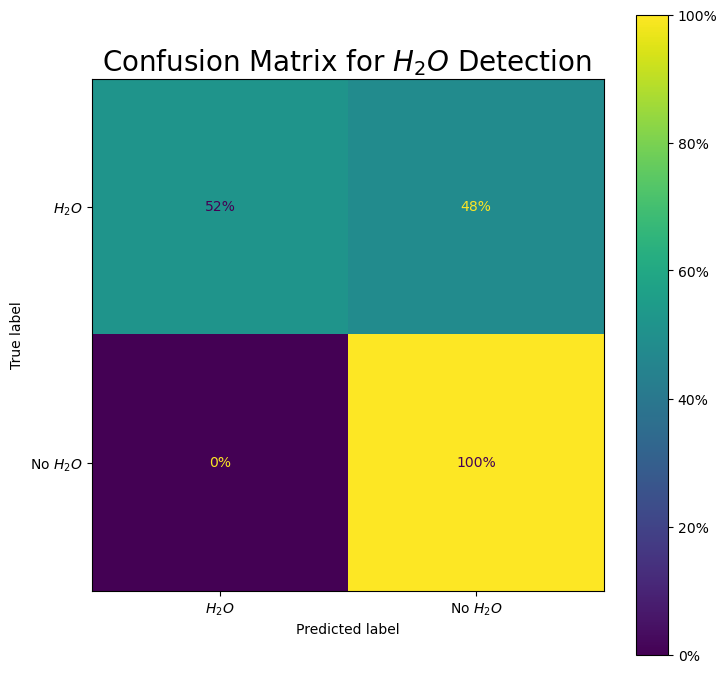

In [13]:
remove_warnings()
SNRall_probabilities = SNRall_rf.predict_proba(SNRall_X_test)[:, 1]
threshold = 0.5
SNRall_y_pred = (SNRall_probabilities > threshold).astype(int)
SNRall_test["pred"] = SNRall_y_pred
SNRall_test["score"] = SNRall_probabilities

print(confusion_matrix(SNRall_y_test, SNRall_y_pred))
print(classification_report(SNRall_y_test, SNRall_y_pred))

plot_confusion_matrix(
    SNRall_y_test, SNRall_y_pred,
    labels=[1,0], display_labels=["$H_2O$", "No $H_2O$"],
    title="Confusion Matrix for $H_2O$ Detection "
)

### scores per mix

In [14]:
SNRall_test_by_atmH2O=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNRall_test_by_atmH2O[i]=SNRall_test[SNRall_test["atm H2O"]==j]
    co2=int(len(SNRall_test[SNRall_test["label"]==0])/10)
    SNRall_test_by_atmH2O[i]=pd.concat([SNRall_test_by_atmH2O[i],
                                      SNRall_test[SNRall_test["label"]==0][i*co2:(i+1)*co2]])
    print(SNRall_test_by_atmH2O[i]["label"].value_counts())
    
    
SNRall_f1 = np.zeros(len(mix_ratios))
SNRall_recall = np.zeros(len(mix_ratios))
SNRall_precision = np.zeros(len(mix_ratios))
SNRall_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNRall_f1[j] = f1_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNRall_recall[j] = recall_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNRall_precision[j]=precision_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                print(f"mix ratio:H2O={mix_ratios[j]}")
                print(confusion_matrix(SNRall_test_by_atmH2O[j]["label"].astype(int),
                                    SNRall_test_by_atmH2O[j]["pred"].astype(int)))
                
                print(f"mean score of :H2O={mix_ratios[j ]} is {SNRall_test_by_atmH2O[j][SNRall_test_by_atmH2O[j]['label']==1]['score'].mean()}")
                SNRall_score[j] = SNRall_test_by_atmH2O[j][
                    SNRall_test_by_atmH2O[j]['label']==1
                    ]['score'].mean()

label
0    3596
1    2105
Name: count, dtype: int64
label
0    3596
1    2126
Name: count, dtype: int64
label
0    3596
1    2159
Name: count, dtype: int64
label
0    3596
1    2042
Name: count, dtype: int64
label
0    3596
1    2161
Name: count, dtype: int64
label
0    3596
1    2105
Name: count, dtype: int64
label
0    3596
1    2089
Name: count, dtype: int64
label
0    3596
1    2100
Name: count, dtype: int64
label
0    3596
1    2062
Name: count, dtype: int64
label
0    3596
1    2086
Name: count, dtype: int64
mix ratio:H2O=1e-10
[[3594    2]
 [1686  419]]
mean score of :H2O=1e-10 is 0.37459909964245924
mix ratio:H2O=1e-09
[[3594    2]
 [1517  609]]
mean score of :H2O=1e-09 is 0.47100604334517787
mix ratio:H2O=1e-08
[[3596    0]
 [1532  627]]
mean score of :H2O=1e-08 is 0.48116690132151146
mix ratio:H2O=1e-07
[[3596    0]
 [1476  566]]
mean score of :H2O=1e-07 is 0.48398754129533317
mix ratio:H2O=1e-06
[[3596    0]
 [1487  674]]
mean score of :H2O=1e-06 is 0.532846599248495
mix rat

### Validation

In [15]:
SNR = 1
SNR_val_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=SNR)
SNR_val_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                         n_repeat=1000,
                                         SNR=SNR)
SNR_val= pd.concat([SNR_val_CO2,SNR_val_H2O],ignore_index=True)

SNR_val_test = SNR_val

SNR_val_test.iloc[:,-n_points:]=normalize_min_max_by_row(
    SNR_val_test.iloc[:,-n_points:]
    )

#SNR_val_test= SNR_val_test[SNR_val_test["atm temperature"]==400]
SNR_val_X_test = SNR_val_test.iloc[:, -n_points:]
SNR_val_y_test = SNR_val_test["label"].astype(int)


In [16]:
SNR_val_X_test

,5.297569,5.290111,5.28264,5.275158,5.267664,5.260158,5.252641,5.245111,5.237568,5.230015,...,0.764875,0.756764,0.748855,0.741148,0.733644,0.726317,0.71918,0.712225,0.705435,0.698805
0,0.345467,0.739125,0.582838,0.381228,0.592096,0.634972,0.634177,0.864827,0.456887,0.748717,...,0.541812,0.539748,0.414393,0.539704,0.608197,0.878075,0.023354,0.617542,0.335800,0.780742
1,0.540814,0.413484,0.344603,0.559385,0.452369,0.562905,0.541330,0.638926,0.621202,0.415213,...,0.675380,0.436263,0.407804,0.581403,0.423317,0.344226,0.456128,0.395689,0.318631,0.681613
2,0.163113,0.544280,0.431462,0.639976,0.567950,0.365919,0.453674,0.344988,0.170570,0.415793,...,0.849263,0.467728,0.579961,0.634136,0.554277,0.376802,0.295902,0.337999,0.466040,0.580202
3,0.528234,0.717376,0.464949,0.586732,0.736313,0.362399,0.382871,0.139673,0.599356,0.452400,...,0.699857,0.473167,0.856667,0.775598,0.524493,0.684676,0.457159,0.597933,0.571480,0.330867
4,0.798088,0.803865,0.462767,0.338579,0.761437,0.703566,0.400302,0.475333,0.350716,0.415827,...,0.499107,0.604221,0.502414,0.595897,0.780539,0.683846,0.872778,0.918838,0.658262,0.844933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.505064,0.715546,0.657041,0.884025,0.669360,0.689807,0.551307,0.548718,0.653925,0.469266,...,0.503435,0.649937,0.404831,0.414936,0.357517,0.204870,0.686324,0.611020,0.475533,0.613183
59996,0.481490,0.666343,0.778119,0.725544,0.397705,0.814278,0.561969,0.630121,0.420238,0.595476,...,0.717025,0.667184,0.468496,0.641725,0.617976,0.453037,0.514920,0.582971,0.563409,0.503774
59997,0.763257,0.628486,0.407868,0.443474,0.540745,0.407677,0.484713,0.641174,0.445385,0.217142,...,0.748495,0.334683,0.488129,0.478263,0.707879,0.468870,0.472210,0.387943,0.652866,0.579098
59998,0.638930,0.457557,0.585674,0.435456,0.538731,0.735798,0.291431,0.404698,0.532573,0.370723,...,0.346151,0.493710,0.487758,0.564296,0.645669,0.828477,0.379983,0.523931,0.275741,0.462465


[[20100  9900]
 [13481 16519]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63     30000
           1       0.63      0.55      0.59     30000

    accuracy                           0.61     60000
   macro avg       0.61      0.61      0.61     60000
weighted avg       0.61      0.61      0.61     60000



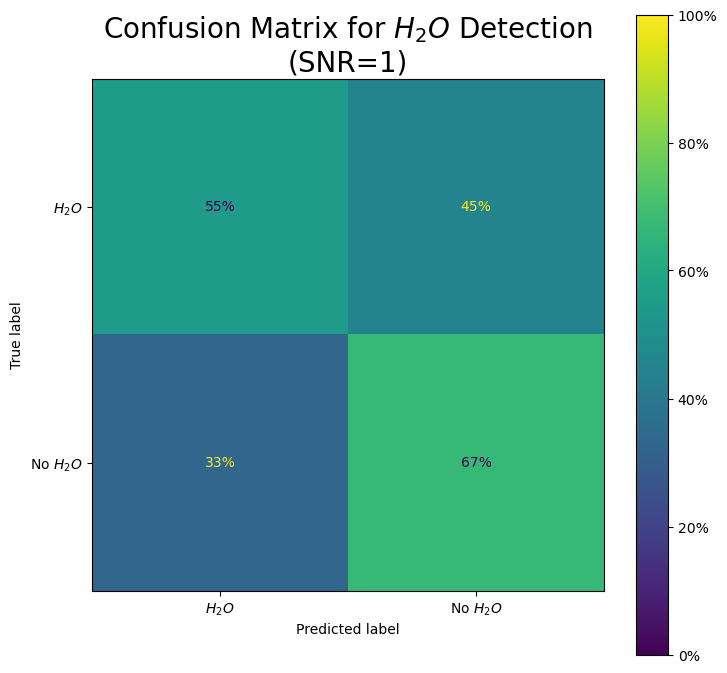

In [18]:
remove_warnings()

SNR_val_predictions = SNRall_rf.predict_proba(SNR_val_X_test)[:, 1]

# Asignar etiquetas basadas en el umbral ajustado
threshold = 0.36
SNR_val_y_pred = (SNR_val_predictions > threshold).astype(int)
SNR_val_test["pred"] = SNR_val_y_pred
SNR_val_test["score"] = SNR_val_predictions

print(confusion_matrix(SNR_val_y_test, SNR_val_y_pred))
print(classification_report(SNR_val_y_test, SNR_val_y_pred))

plot_confusion_matrix(
    SNR_val_y_test, SNR_val_y_pred,
    labels=[1,0], display_labels=["$H_2O$", "No $H_2O$"],
    title=f"Confusion Matrix for $H_2O$ Detection\n(SNR={SNR})"
)

label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
mix ratio:H2O=1e-10
[[2003  997]
 [2029  971]]
mean score of :H2O=1e-10 is 0.3416011641329803
mix ratio:H2O=1e-09
[[1998 1002]
 [2024  976]]
mean score of :H2O=1e-09 is 0.3420789017091977
mix ratio:H2O=1e-08
[[2003  997]
 [1955 1045]]
mean score of :H2O=1e-08 is 0.34382294853063605
mix ratio:H2O=1e-07
[[1964 1036]
 [1944 1056]]
mean score of :H2O=1e-07 is 0.34418574330646207
mix ratio:H2O=1e-06
[[1971 1029]
 [1779 1221]]
mean score of :H2O=1e-06 is 0.351264304452968
mix ratio

Text(0.5, 1.0, 'Scores for $H_2O$ Detection\n(SNR=1)')

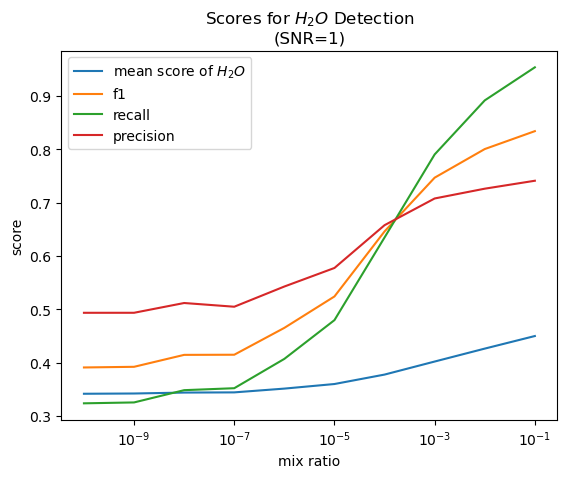

In [19]:
SNR_val_by_atmH2O=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNR_val_by_atmH2O[i]=SNR_val_test[SNR_val_test["atm H2O"]==j]
    #concatenate  CO2 spectra to each atm O3
    co2=int(len(SNR_val_test[SNR_val_test["label"]==0])/10)
    SNR_val_by_atmH2O[i]=pd.concat([SNR_val_by_atmH2O[i],
                                      SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])
    print(SNR_val_by_atmH2O[i]["label"].value_counts())
    
SNR_val_f1 = np.zeros(len(mix_ratios))
SNR_val_recall = np.zeros(len(mix_ratios))
SNR_val_precision = np.zeros(len(mix_ratios))
SNR_val_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNR_val_f1[j] = f1_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNR_val_recall[j] = recall_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNR_val_precision[j]=precision_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                print(f"mix ratio:H2O={mix_ratios[j]}")
                print(confusion_matrix(SNR_val_by_atmH2O[j]["label"].astype(int),
                                    SNR_val_by_atmH2O[j]["pred"].astype(int)))
                
                print(f"mean score of :H2O={mix_ratios[j ]} is {SNR_val_by_atmH2O[j][SNR_val_by_atmH2O[j]['label']==1]['score'].mean()}")
                SNR_val_score[j] = SNR_val_by_atmH2O[j][
                    SNR_val_by_atmH2O[j]['label']==1
                    ]['score'].mean()


plt.figure()
plt.plot(mix_ratios,SNR_val_score,label="mean score of $H_2O$")
plt.plot(mix_ratios,SNR_val_f1,label="f1")
plt.plot(mix_ratios,SNR_val_recall,label="recall")
plt.plot(mix_ratios,SNR_val_precision,label="precision")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")

plt.legend()
plt.title(f"Scores for $H_2O$ Detection\n(SNR={SNR})")